### Re-creating convolution intro notebook

Exploring convolutions using mnist dataset

Finding edges - horizontal/vertical and diagonal


In [2]:
import tensorflow as tf
import numpy as np

%matplotlib inline

import matplotlib.pyplot as plt

from ipywidgets import interact, interactive, fixed

from tensorflow.examples.tutorials import mnist

In [3]:
data = mnist.input_data.read_data_sets("MNIST_data")

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
# Get the images and the labels
"""
images, labels = data.train.images, data.train.labels
images.shape
# Save the images to disk after resizing
images = images.reshape((55000,28,28))

%mkdir ./data/MNIST_data
%mkdir ./data/MNIST_data/train

np.savez_compressed("./data/MNIST_data/train", images = images, labels = labels)
"""

'\nimages, labels = data.train.images, data.train.labels\nimages.shape\n# Save the images to disk after resizing\nimages = images.reshape((55000,28,28))\n\n%mkdir ./data/MNIST_data\n%mkdir ./data/MNIST_data/train\n\nnp.savez_compressed("./data/MNIST_data/train", images = images, labels = labels)\n'

In [4]:
data = np.load("./data/MNIST_data/train.npz")
images = data['images']
labels = data['labels']

In [5]:
images.shape

(55000, 28, 28)

In [6]:
# Plotting many images
plt.imshow(images[0],interpolation=None?

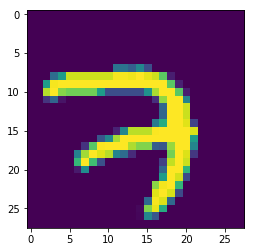

In [7]:
plt.imshow(images[0],interpolation=None)

In [8]:
def plot(img):
    plt.imshow(img, interpolation=None, cmap='gray')

In [9]:
# Plotting multiple images
def plots(images, titles=None):
    fig = plt.figure(figsize=(12,8))
    for i in range(len(images)):
        sp = fig.add_subplot(1, len(images), i + 1)
        if titles is not None:
            sp.set_title(titles[i])
        plt.imshow(images[i], cmap = 'gray')

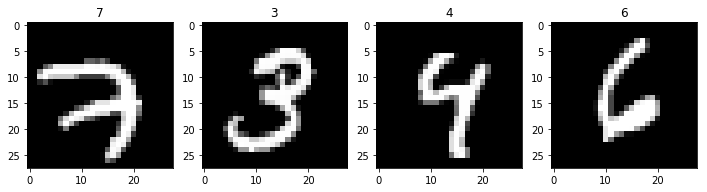

In [10]:
plots(images[0:4], labels[0:4])

In [11]:
top = [[-1, -1, -1],
       [1,1,1],
       [0,0,0]]

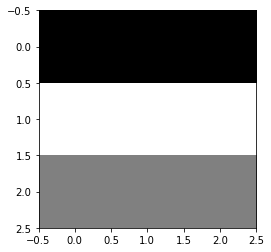

In [12]:
plot(top)

Widget Javascript not detected.  It may not be installed or enabled properly.


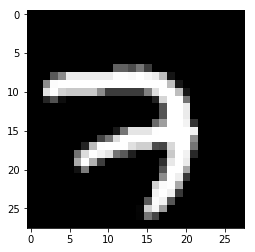

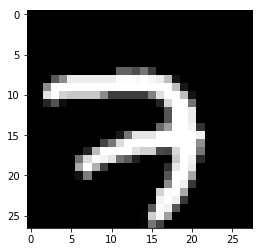

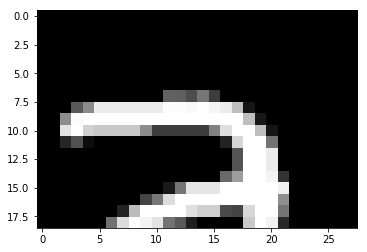

In [13]:
# Zoom image - plotting only a specific subsection of the image
r = (0, 28)
def zoomim(x1 = 0, x2 = 28, y1 = 0, y2 = 28):
    plot(images[0,y1:y2, x1:x2])
# Interactive - these are from ipython widgets
w = interactive(zoomim, x1 = r, x2 = r, y1 = r, y2 = r)
w

In [55]:
dims

(slice(6, 15, 1), slice(0, 28, None))

In [52]:
# He is applying some sort of exponential function
# Not really - index_exp stands for index Expression and gets you a slice object 
# that can later be used to get a slice of the array
# gets the parameters in a dictionary - nice! 
k = w.kwargs
dims = np.index_exp[k['y1']:k['y2']:1, k['x1']:k['x2']]
images[0][dims]

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.38039219,  0.37647063,  0.3019608 ,  0.46274513,
         0.2392157 ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.35294119,  0.5411765 ,
         0.92156869,  0.92156869,  0.92156869,  0.92156869,  0.92156869,
         0.92156869,  0.9843

In [56]:
corrtop = np.correlate?

In [14]:
from scipy.ndimage.filters import correlate, convolve

In [15]:
corrtop = correlate(images[0], top)

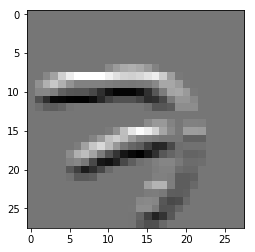

In [16]:
plot(corrtop)

In [17]:
np.rot90(top, 1)

array([[-1,  1,  0],
       [-1,  1,  0],
       [-1,  1,  0]])

In [18]:
np.rot90(top, 2)

array([[ 0,  0,  0],
       [ 1,  1,  1],
       [-1, -1, -1]])

In [19]:
convtop = convolve(images[0], np.rot90(top, 2))

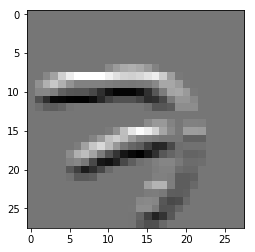

In [20]:
plot(convtop)

In [21]:
# Convolution with the twice rotated array is the same as correlation with the unrotated one
# allclose checks if the two matrices are close within a tolerance
np.allclose(corrtop, convtop)

True

In [22]:
straights = [np.rot90(top, i) for i in range(4)]

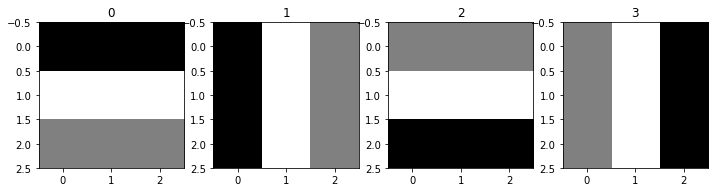

In [23]:
plots(straights,titles = [0, 1, 2, 3])

In [24]:
br = [[0,0,1],
     [0,1,-1.5],
     [1,-1.5,0]]

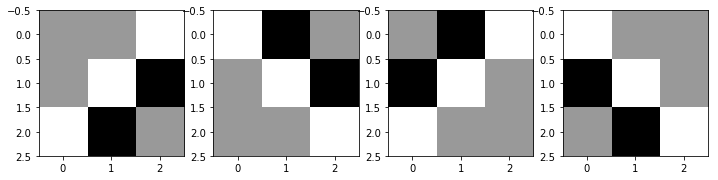

In [25]:
diags = [np.rot90(br, i) for i in range(4)]
plots(diags)

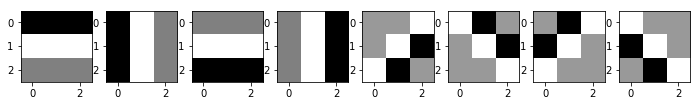

In [27]:
rots = straights + diags
plots(rots)

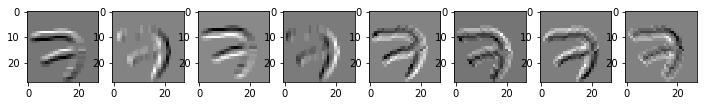

In [28]:
corrs = [correlate(images[0], rot) for rot in rots]
plots(corrs)

In [29]:
from skimage.measure import block_reduce

In [30]:
# block_reduce is to do max pooling or averaging out a block
def pool(im):
    return block_reduce(im, (7,7), np.max)

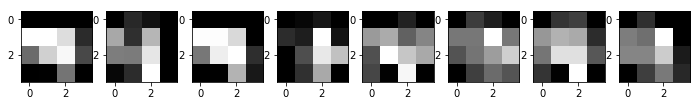

In [31]:
plots([pool(im) for im in corrs])

In [32]:
# comparing eights and ones by looking at what the correlation/convolution does for them
eights = [images[i] for i in range(len(images)) if labels[i] ==8]
ones = [images[i] for i in range(len(images)) if labels[i] ==1]

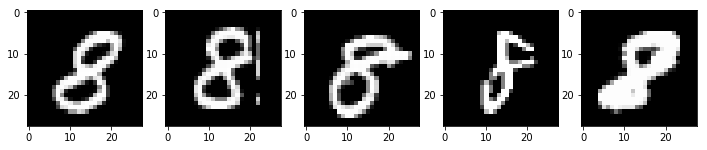

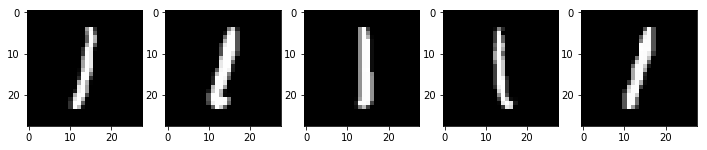

In [33]:
plots(eights[:5])
plots(ones[:5])

In [34]:
pool8  = [np.array([pool(correlate(im, rot)) for im in eights]) for rot in rots]

In [37]:
pool8[0].shape

(5389, 4, 4)

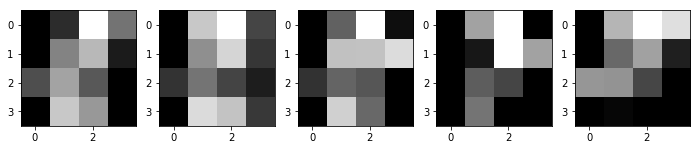

In [38]:
plots(pool8[0][0:5])

In [39]:
def normalize(arr):
    return (arr - arr.mean())/arr.std()

In [40]:
np.mean?

In [42]:
filts8 = np.array([ims.mean(axis = 0) for ims in pool8])
filts8 = normalize(filts8)

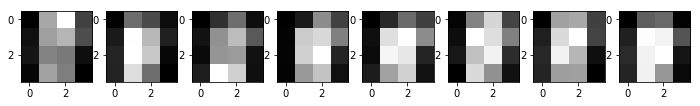

In [43]:
plots(filts8)

In [ ]:
#Folding code


asarts

